In [80]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import StandardScaler

In [81]:
data = pd.read_csv("Mall_Customers.csv")

In [82]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [83]:
#we will be ussing last two columns for clustering
X = data.iloc[:,[3,4]].values

##Check the Data

In [85]:
X.shape

(200, 2)

In [86]:
array_sum = np.sum(X)
array_null = np.isnan(array_sum)
print(array_null)

False


In [87]:
#as the output is false this means we don't have any null values and we cna move on

In [88]:
#check for datatype
X.dtype

dtype('int64')

In [89]:
#as the datype is integer no need for conversion

##Compile and Fit the model

In [185]:
dbscan = DBSCAN(eps=9,min_samples=4)

In [186]:
model = dbscan.fit(X)
model

DBSCAN(algorithm='auto', eps=9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

##Collecting the labels 

In [187]:
labels  = model.labels_

In [188]:
print(len(labels))

200


In [189]:
from sklearn import metrics

In [190]:
#identifying the points which makes up our core points
labels_1 = np.zeros_like(labels, dtype=bool)

In [191]:
labels_1[dbscan.core_sample_indices_]= True


In [192]:

#Calculating the number of clusters

n_clusters = len(set(labels))- (1 if -1 in labels else 0)

In [193]:
print(n_clusters)

7


In [194]:
print(metrics.silhouette_score(X,labels))

0.4259680122384905


##Plot the data

In [195]:
import matplotlib.pyplot as plt


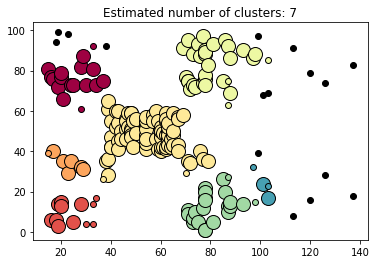

In [196]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & labels_1]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~labels_1]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()